In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [139]:
# Load the dataset
df = pd.read_csv("train.csv")

In [141]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [143]:
# Basic information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [145]:
# Display descriptive statistics
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [147]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [149]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display percentage of missing values for each column
print(missing_percentage[missing_percentage > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [151]:
# Drop columns with more than 50% NaN values
threshold = 0.5
df_cleaned = df.dropna(axis=1, thresh=int((1-threshold) * len(df)))

In [153]:
# Check the remaining columns
print(df_cleaned.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [155]:
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [157]:
# Separate numerical and categorical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns


In [159]:
# Calculate mean and median for numerical columns
numerical_stats = df_cleaned[numerical_columns].agg(['mean', 'median']).T  # T for transpose
print("Numerical statistics (mean and median):")
print(numerical_stats)

Numerical statistics (mean and median):
                        mean    median
Id                730.500000     730.5
MSSubClass         56.897260      50.0
LotFrontage        70.049958      69.0
LotArea         10516.828082    9478.5
OverallQual         6.099315       6.0
OverallCond         5.575342       5.0
YearBuilt        1971.267808    1973.0
YearRemodAdd     1984.865753    1994.0
MasVnrArea        103.685262       0.0
BsmtFinSF1        443.639726     383.5
BsmtFinSF2         46.549315       0.0
BsmtUnfSF         567.240411     477.5
TotalBsmtSF      1057.429452     991.5
1stFlrSF         1162.626712    1087.0
2ndFlrSF          346.992466       0.0
LowQualFinSF        5.844521       0.0
GrLivArea        1515.463699    1464.0
BsmtFullBath        0.425342       0.0
BsmtHalfBath        0.057534       0.0
FullBath            1.565068       2.0
HalfBath            0.382877       0.0
BedroomAbvGr        2.866438       3.0
KitchenAbvGr        1.046575       1.0
TotRmsAbvGrd        6.51

In [161]:
mode_stats = {}

for col in categorical_columns:
    # Calculate the mode for each column
    col_mode = df[col].mode()  # Returns a Series with modes
    if not col_mode.empty:  # If there is at least one mode
        mode_stats[col] = col_mode.iloc[0]  # Use the first mode
    else:
        mode_stats[col] = "Unknown"  # Fallback to 'Unknown' if mode cannot be computed


In [163]:
print(mode_stats)

{'MSZoning': 'RL', 'Street': 'Pave', 'LotShape': 'Reg', 'LandContour': 'Lvl', 'Utilities': 'AllPub', 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm', 'BldgType': '1Fam', 'HouseStyle': '1Story', 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'VinylSd', 'Exterior2nd': 'VinylSd', 'ExterQual': 'TA', 'ExterCond': 'TA', 'Foundation': 'PConc', 'BsmtQual': 'TA', 'BsmtCond': 'TA', 'BsmtExposure': 'No', 'BsmtFinType1': 'Unf', 'BsmtFinType2': 'Unf', 'Heating': 'GasA', 'HeatingQC': 'Ex', 'CentralAir': 'Y', 'Electrical': 'SBrkr', 'KitchenQual': 'TA', 'Functional': 'Typ', 'FireplaceQu': 'Gd', 'GarageType': 'Attchd', 'GarageFinish': 'Unf', 'GarageQual': 'TA', 'GarageCond': 'TA', 'PavedDrive': 'Y', 'SaleType': 'WD', 'SaleCondition': 'Normal'}


In [165]:
# Prepare dictionaries for imputation
numerical_imputation = {col: df[col].mean() for col in numerical_columns}  # Mean or median can be used
categorical_imputation = {col: mode_stats[col] if pd.notnull(mode_stats[col]) else 
                          "Unknown" for col in categorical_columns}

In [167]:
# Output preparation for imputation dictionaries

print("\nPrepared imputation values for numerical variables (using mean):")
print(numerical_imputation)
print("\nPrepared imputation values for categorical variables (using mode or 'Unknown'):")
print(categorical_imputation)


Prepared imputation values for numerical variables (using mean):
{'Id': 730.5, 'MSSubClass': 56.897260273972606, 'LotFrontage': 70.04995836802665, 'LotArea': 10516.828082191782, 'OverallQual': 6.0993150684931505, 'OverallCond': 5.575342465753424, 'YearBuilt': 1971.267808219178, 'YearRemodAdd': 1984.8657534246574, 'MasVnrArea': 103.68526170798899, 'BsmtFinSF1': 443.6397260273973, 'BsmtFinSF2': 46.54931506849315, 'BsmtUnfSF': 567.2404109589041, 'TotalBsmtSF': 1057.4294520547944, '1stFlrSF': 1162.626712328767, '2ndFlrSF': 346.99246575342465, 'LowQualFinSF': 5.844520547945206, 'GrLivArea': 1515.463698630137, 'BsmtFullBath': 0.42534246575342466, 'BsmtHalfBath': 0.057534246575342465, 'FullBath': 1.5650684931506849, 'HalfBath': 0.38287671232876713, 'BedroomAbvGr': 2.8664383561643834, 'KitchenAbvGr': 1.0465753424657533, 'TotRmsAbvGrd': 6.517808219178082, 'Fireplaces': 0.613013698630137, 'GarageYrBlt': 1978.5061638868744, 'GarageCars': 1.7671232876712328, 'GarageArea': 472.9801369863014, 'Wood

In [169]:

from sklearn.impute import SimpleImputer

# Automatically identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Check the columns detected
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

#Impute missing data

if numerical_columns:
    numerical_imputer = SimpleImputer(strategy='median')
    df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
else:
    print("No numerical columns to impute.")

# Check the result after imputation
print(df[numerical_columns].head())


Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fireplace

In [171]:
print(numerical_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [173]:
print(categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [175]:
# Calculate mean and median for all numerical variables
stats = df_cleaned[numerical_columns].agg(['mean', 'median'])
print(stats)

           Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
mean    730.5    56.89726    70.049958  10516.828082     6.099315   
median  730.5    50.00000    69.000000   9478.500000     6.000000   

        OverallCond    YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  \
mean       5.575342  1971.267808   1984.865753  103.685262  443.639726  ...   
median     5.000000  1973.000000   1994.000000    0.000000  383.500000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
mean     94.244521    46.660274       21.95411   3.409589    15.060959   
median    0.000000    25.000000        0.00000   0.000000     0.000000   

        PoolArea    MiscVal    MoSold       YrSold     SalePrice  
mean    2.758904  43.489041  6.321918  2007.815753  180921.19589  
median  0.000000   0.000000  6.000000  2008.000000  163000.00000  

[2 rows x 38 columns]


In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_cleaned[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("\nData after StandardScaler applied:")
print(df_cleaned[numerical_columns].head())



Data after StandardScaler applied:
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0   1.050994      0.878668    0.514104    0.575425  ...   -0.752176   
1   0.156734     -0.429577   -0.570750    1.171992  ...    1.626195   
2   0.984752      0.830215    0.325915    0.092907  ...   -0.752176   
3  -1.863632     -0.720298   -0.570750   -0.499274  ...   -0.752176   
4   0.951632      0.733308    1.366489    0.463568  ...    0.780197   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
0  

/var/folders/4m/fmdhb3vs3k3772b1d17901p00000gp/T/ipykernel_67371/2139445301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [179]:
from sklearn.preprocessing import LabelEncoder

## Encoding Categorical Variables

categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Define a dictionary or set to hold nominal and ordinal columns
nominal_columns = []
ordinal_columns = []

ordinal_mapping = {
    'Excellent': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}

# Iterate over categorical columns to decide which are nominal and which are ordinal
for col in categorical_columns:
    # Check if the column should be ordinal 
    if df_cleaned[col].dropna().isin(ordinal_mapping.keys()).all():  # Check if all values are in ordinal mapping
        ordinal_columns.append(col)
    else:
        nominal_columns.append(col)

# One-Hot Encoding for nominal variables
df_cleaned = pd.get_dummies(df_cleaned, columns=nominal_columns, drop_first=True)  # drop_first to avoid multicollinearity

# Label Encoding for ordinal variables
label_encoder = LabelEncoder()

# Apply the mapping to ordinal columns 
for col in ordinal_columns:
    df_cleaned[col] = df_cleaned[col].map(ordinal_mapping)

# Apply Label Encoding for other categorical variables not included in nominal or ordinal columns
for col in categorical_columns:
    if col not in nominal_columns + ordinal_columns:
        df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Print the DataFrame after encoding (optional)
print("\nData after encoding:")
print(df_cleaned.head())



Data after encoding:
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.050994      0.878668    0.514104    0.575425  ...           False   
1   0.156734     -0.429577   -0.570750    1.171992  ...           False   
2   0.984752      0.830215    0.325915    0.092907  ...           False   
3  -1.863632     -0.720298   -0.570750   -0.499274  ...           False   
4   0.951632      0.733308    1.366489    0.463568  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0       

Text(0.5, 1.0, 'Correlation Heatmap: Features vs SalePrice')

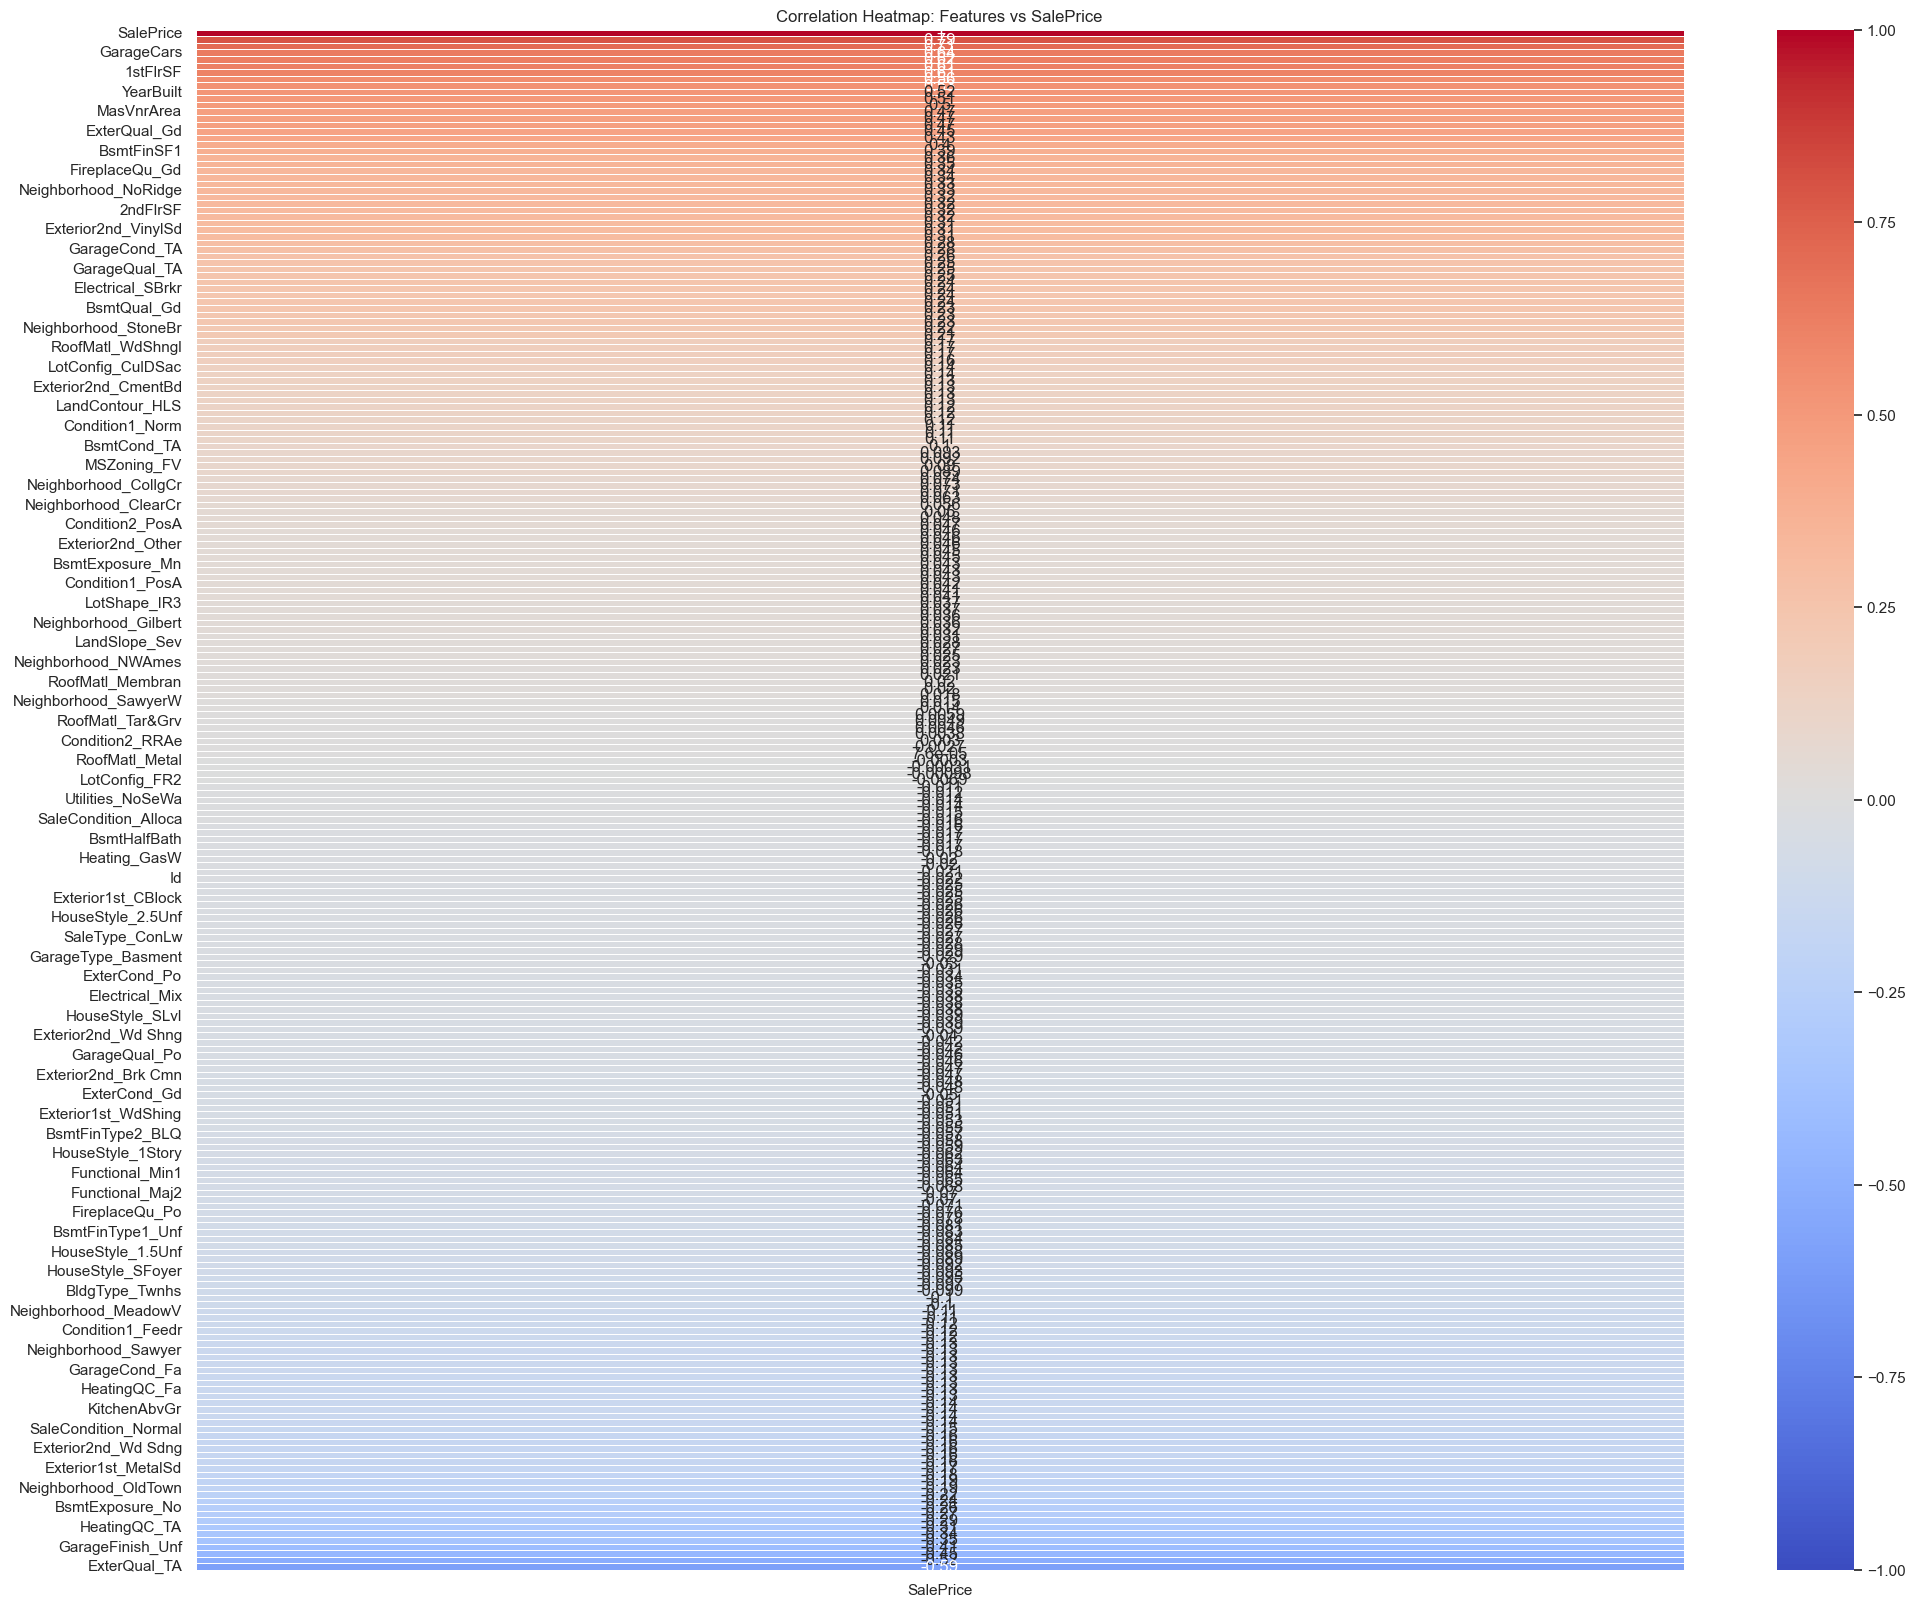

In [181]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(24,20))  # Set the size of the heatmap
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Heatmap: Features vs SalePrice')


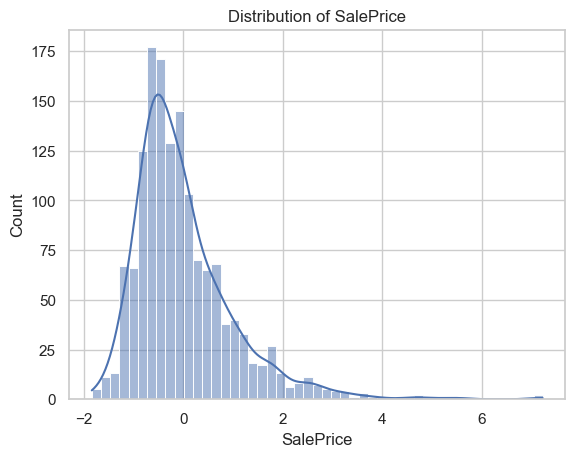

In [183]:
# Distribution of SalePrice
sns.histplot(df_cleaned['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

/Users/Surface1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


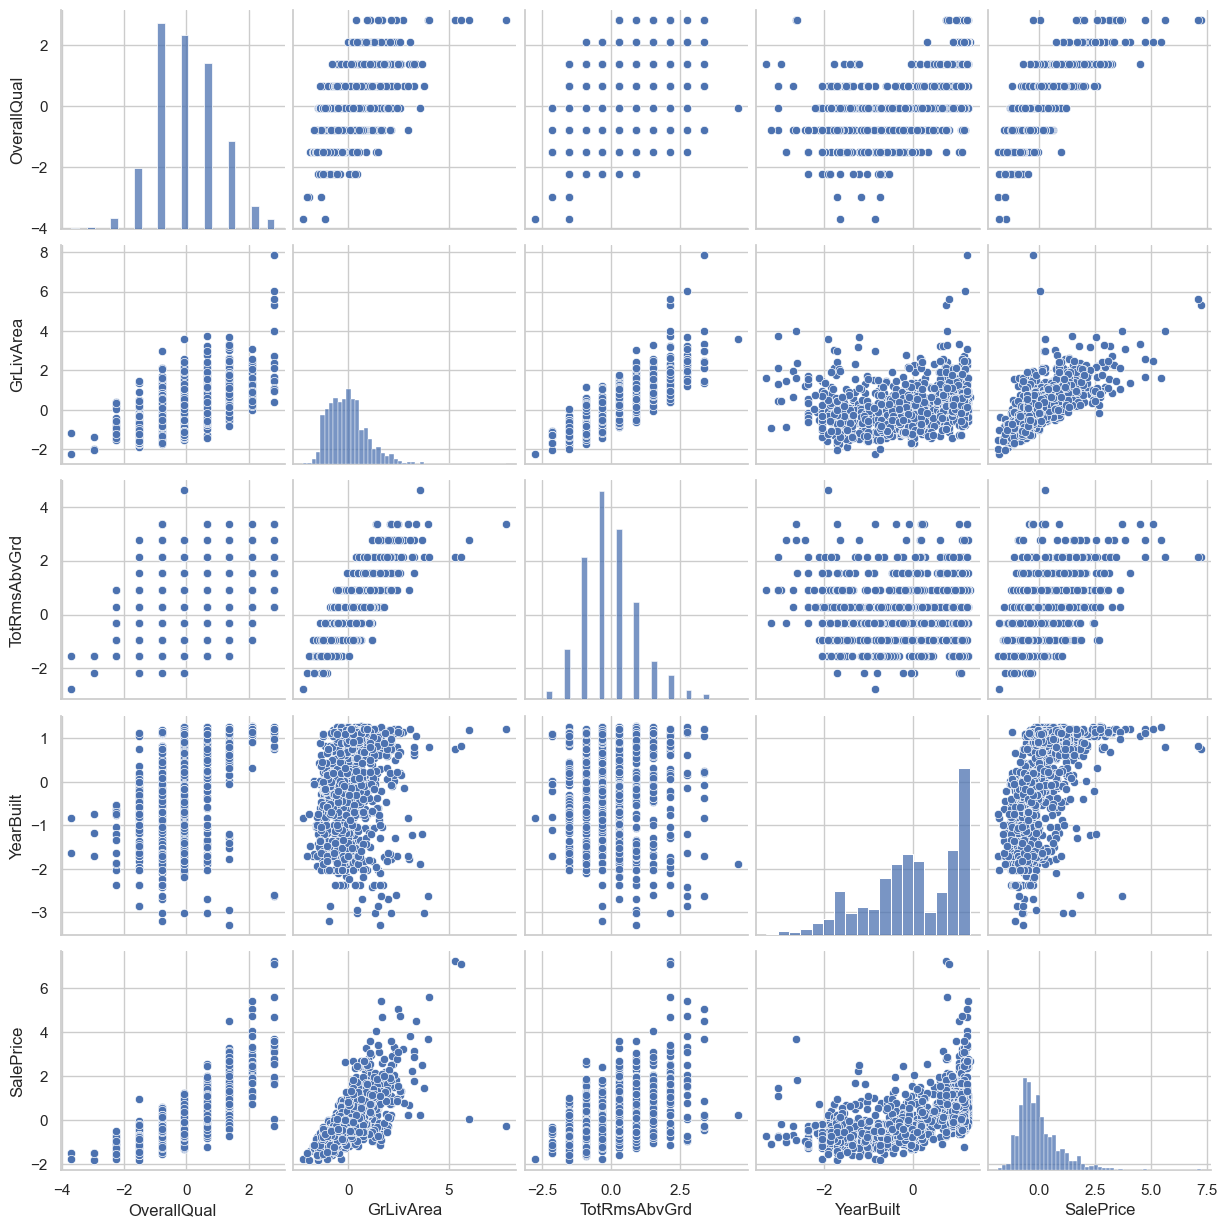

In [185]:
# Pairplot between numerical variables and SalePrice
sns.pairplot(df_cleaned, vars=['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice'])

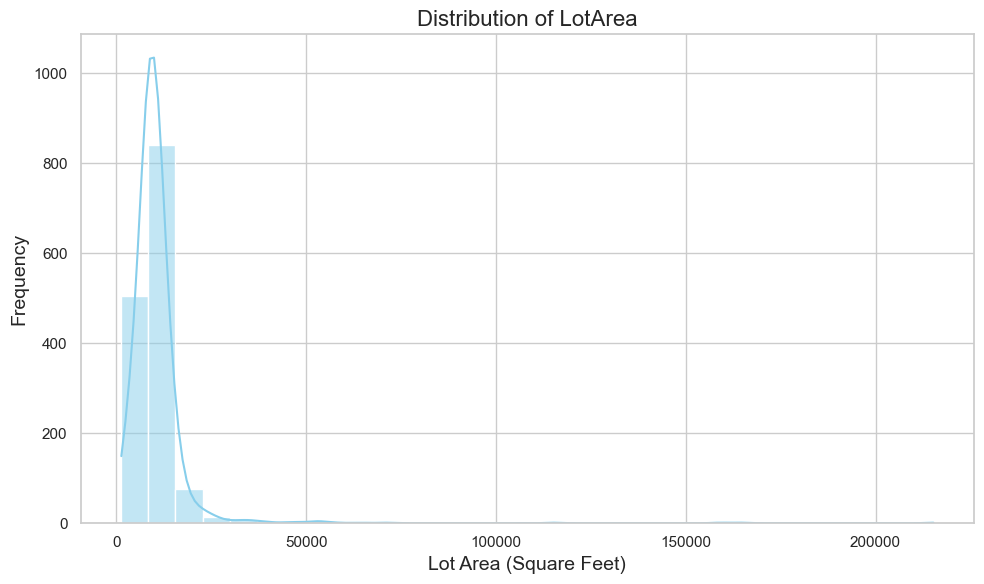

In [186]:
sns.set(style="whitegrid")

# Example for plotting a clearer histogram for 'LotArea' (or any numerical column you choose)
plt.figure(figsize=(10, 6))  # Increase the figure size for better readability
sns.histplot(df['LotArea'], kde=True, color='skyblue', bins=30)  # Add Kernel Density Estimate (KDE) for smoothness

# Add labels and title
plt.title('Distribution of LotArea', fontsize=16)
plt.xlabel('Lot Area (Square Feet)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show gridlines and adjust layout for clarity
plt.grid(True)
plt.tight_layout()


In [189]:
from scipy import stats

# Define groups
group_1 = df_cleaned[df_cleaned['OverallQual'] == 10]['SalePrice']
group_2 = df_cleaned[df_cleaned['OverallQual'] == 1]['SalePrice']

# Perform t-test (Welch's t-test for unequal variances)
if len(group_1) > 2 and len(group_2) > 2:
    t_stat, p_value = stats.ttest_ind(group_1, group_2, equal_var=False)
    print(f"T-test Results:\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
else:
    print("Insufficient data in one or both groups for hypothesis testing.")


Insufficient data in one or both groups for hypothesis testing.


In [191]:
# Prepare groups for ANOVA
anova_groups = [df_cleaned[df_cleaned['OverallQual'] == i]['SalePrice'] for i in df_cleaned['OverallQual'].unique()]

# Perform ANOVA
anova_f_stat, anova_p_value = stats.f_oneway(*anova_groups)
print(f"ANOVA Results:\nF-statistic: {anova_f_stat:.4f}, P-value: {anova_p_value:.4f}")
if anova_p_value < 0.05:
    print("Reject the null hypothesis: SalePrice varies significantly across OverallQual categories.")
else:
    print("Fail to reject the null hypothesis: No significant variation in SalePrice across OverallQual categories.")


ANOVA Results:
F-statistic: 349.0268, P-value: 0.0000
Reject the null hypothesis: SalePrice varies significantly across OverallQual categories.


In [193]:
# Example: Correlation between SalePrice and GrLivArea (Above Grade Living Area)
corr, p_value = stats.pearsonr(df_cleaned['SalePrice'], df_cleaned['GrLivArea'])
print(f"Correlation Results:\nCorrelation Coefficient: {corr:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

Correlation Results:
Correlation Coefficient: 0.7086, P-value: 0.0000
Reject the null hypothesis: There is a significant correlation.


In [195]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df_cleaned is your DataFrame and SalePrice is the target variable
X = df_cleaned.drop(columns=['SalePrice'])  # Features
y = df_cleaned['SalePrice']  # Target variable

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Initialize RFE and select the top 10 features
rfe = RFE(estimator=model, n_features_to_select=10)  # Select the top 10 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Top 10 selected features:", selected_features)


Top 10 selected features: Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl'],
      dtype='object')


In [206]:
# Replace zero or negative values with a small constant before log transformation
df_cleaned[skewed_features] = df_cleaned[skewed_features].applymap(lambda x: max(x, 0) if isinstance(x, (int, float)) else x)
df_cleaned[skewed_features] = df_cleaned[skewed_features].apply(lambda x: np.log(x + 1))


In [208]:
# Check skewness of numerical features
skewness = df_cleaned[numerical_columns].skew().sort_values(ascending=False)
skewed_features = skewness[skewness > 0.75].index  # Consider features with skewness > 0.75

# Apply log transformation to these skewed features
df_cleaned[skewed_features] = df_cleaned[skewed_features].apply(lambda x: np.log(x + 1))

# Specifically for LotArea and SalePrice, applying log transformation:
df_cleaned['Log_LotArea'] = np.log(df_cleaned['LotArea'] + 1)
df_cleaned['Log_SalePrice'] = np.log(df_cleaned['SalePrice'] + 1)


/Users/Surface1/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df_cleaned.drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [114]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest Mean Squared Error: 0.13224207755957


In [116]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb = GradientBoostingRegressor()

# Fit the model
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")


Gradient Boosting Mean Squared Error: 0.12225315035451491


In [118]:
# Model Comparison and Conclusion
print("Linear Regression MSE:", mse)
print("Random Forest MSE:", mse_rf)
print("Gradient Boosting MSE:", mse_gb)


Linear Regression MSE: 8.680143112082246e+16
Random Forest MSE: 0.13224207755957
Gradient Boosting MSE: 0.12225315035451491


In [104]:
#The model with the lowest Mean Squared Error (MSE) will likely be the best performing. 
# However, R² score, cross-validation, and hyperparameter tuning are important next steps to refine the model.